# PROGETTO Business Intelligence per I Servizi Finanziari


In [1]:
# importazione iniziale delle librerie
from datetime import date, datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

## 1. Sommario dei dati utilizzati

In [2]:
start_date = '2011-11-30'
end_date = '2021-11-30'

In [3]:
# Communication Service
DIS = web.get_data_yahoo('DIS', start_date, end_date)
SONY = web.get_data_yahoo('SONY', start_date, end_date)

In [4]:
# Health Care
PFE = web.get_data_yahoo('PFE', start_date, end_date)
JNJ = web.get_data_yahoo('JNJ', start_date, end_date)

In [5]:
# Transportation
BKNG = web.get_data_yahoo('BKNG', start_date, end_date)
EXPE = web.get_data_yahoo('EXPE', start_date, end_date)

In [6]:
SONY.head(10) # SONY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-30,18.200001,17.969999,18.000000,18.049999,2011700,18.049999
2011-12-01,18.100000,17.900000,17.980000,17.990000,1078500,17.990000
2011-12-02,18.070000,17.700001,18.070000,17.770000,1178100,17.770000
2011-12-05,18.040001,17.750000,17.889999,17.879999,587300,17.879999
2011-12-06,17.799999,17.549999,17.799999,17.680000,616100,17.680000
2011-12-07,18.610001,18.389999,18.480000,18.530001,1975400,18.530001
2011-12-08,18.559999,18.080000,18.500000,18.139999,1469200,18.139999
2011-12-09,18.290001,17.990000,18.120001,18.280001,2168300,18.280001
2011-12-12,18.020000,17.700001,18.020000,17.870001,840500,17.870001


In [7]:
DIS.head(10) # The Walt Disney Company

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-30,35.889999,34.660000,34.680000,35.849998,16536000.0,31.567966
2011-12-01,36.330002,35.720001,36.029999,35.990002,10350800.0,31.691235
2011-12-02,36.830002,36.299999,36.330002,36.610001,10202500.0,32.237186
2011-12-05,37.369999,36.730000,37.040001,36.939999,9973900.0,32.527767
2011-12-06,37.200001,36.750000,36.869999,36.830002,6573100.0,32.430916
2011-12-07,37.330002,36.459999,36.709999,37.099998,9543600.0,32.668655
2011-12-08,36.959999,35.820000,36.860001,35.919998,9881700.0,31.629602
2011-12-09,36.770000,36.169998,36.169998,36.560001,7323400.0,32.193157
2011-12-12,36.770000,35.919998,36.200001,36.650002,10050800.0,32.272408


In [8]:
PFE.head(10) # PFIZER

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-30,19.041746,18.519924,18.557875,19.041746,76779895.0,13.022164
2011-12-01,19.174574,18.870968,19.003796,19.003796,45119527.0,12.996216
2011-12-02,19.155598,18.851992,19.098673,18.870968,44988093.0,12.905373
2011-12-05,19.146111,18.719166,19.089184,18.823528,50895236.0,12.872934
2011-12-06,19.373814,18.927895,19.060720,19.193548,55653835.0,13.125983
2011-12-07,19.573055,19.070210,19.089184,19.421251,50414823.0,13.281699
2011-12-08,19.487665,19.089184,19.278936,19.155598,37986265.0,13.100023
2011-12-09,19.611006,19.203035,19.259962,19.506641,45843098.0,13.340096
2011-12-12,19.497154,19.193548,19.335863,19.345350,42414119.0,13.229792


In [9]:
JNJ.head(10) # JOHNSON AND JOHNSON 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-30,64.739998,63.799999,63.919998,64.720001,15032600.0,48.166534
2011-12-01,64.949997,64.349998,64.680000,64.449997,9852700.0,47.965599
2011-12-02,64.889999,63.299999,64.870003,63.470001,15792800.0,47.236248
2011-12-05,64.250000,62.849998,64.099998,63.360001,15294500.0,47.154381
2011-12-06,63.930000,63.259998,63.610001,63.490002,10417800.0,47.251129
2011-12-07,64.809998,63.369999,63.570000,64.449997,11504700.0,47.965599
2011-12-08,64.449997,63.560001,64.139999,63.779999,9566800.0,47.466953
2011-12-09,64.680000,63.980000,64.320000,64.529999,8835700.0,48.025124
2011-12-12,64.199997,63.349998,63.869999,63.509998,10808700.0,47.266014


In [10]:
BKNG.head(10) # Booking.com

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-30,486.450012,472.940002,478.890015,485.890015,1160900,485.890015
2011-12-01,493.269989,482.010010,483.869995,488.429993,816400,488.429993
2011-12-02,498.820007,485.000000,497.420013,486.480011,979100,486.480011
2011-12-05,495.630005,478.989990,495.630005,484.019989,888000,484.019989
2011-12-06,485.880005,473.359985,482.769989,479.100006,860700,479.100006
2011-12-07,486.390015,472.000000,476.709991,484.290009,994100,484.290009
2011-12-08,486.000000,477.000000,482.859985,479.459991,860600,479.459991
2011-12-09,482.000000,474.380005,480.000000,479.739990,762900,479.739990
2011-12-12,476.269989,468.000000,474.500000,475.390015,629400,475.390015


In [11]:
EXPE.head(10) # Expedia.com

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-30,56.380001,55.180000,56.060001,55.639999,2016750.0,37.492008
2011-12-01,57.000000,55.520000,55.959999,56.060001,1729500.0,37.775017
2011-12-02,57.759998,56.099998,56.380001,56.200001,2091500.0,37.869354
2011-12-05,58.660000,56.480000,57.060001,57.840000,1730250.0,38.974430
2011-12-06,58.020000,57.240002,58.000000,57.619999,1661700.0,38.826191
2011-12-07,59.080002,56.480000,57.340000,58.419998,2015050.0,39.365253
2011-12-08,57.799999,55.419998,56.619999,56.080002,2647000.0,37.788498
2011-12-09,57.660000,56.060001,56.160000,57.000000,1738550.0,38.408413
2011-12-12,56.919998,56.220001,56.599998,56.860001,2077150.0,38.314087


In [12]:
# Join SONY e DIS (settore Communication Service )
SONY_DIS = SONY.join(DIS, lsuffix = "_SONY", rsuffix = "_DIS")
SONY_DIS

,High_SONY,Low_SONY,Open_SONY,Close_SONY,Volume_SONY,Adj Close_SONY,High_DIS,Low_DIS,Open_DIS,Close_DIS,Volume_DIS,Adj Close_DIS
Date,,,,,,,,,,,,
2011-11-30,18.200001,17.969999,18.000000,18.049999,2011700,18.049999,35.889999,34.660000,34.680000,35.849998,16536000.0,31.567966
2011-12-01,18.100000,17.900000,17.980000,17.990000,1078500,17.990000,36.330002,35.720001,36.029999,35.990002,10350800.0,31.691235
2011-12-02,18.070000,17.700001,18.070000,17.770000,1178100,17.770000,36.830002,36.299999,36.330002,36.610001,10202500.0,32.237186
2011-12-05,18.040001,17.750000,17.889999,17.879999,587300,17.879999,37.369999,36.730000,37.040001,36.939999,9973900.0,32.527767
2011-12-06,17.799999,17.549999,17.799999,17.680000,616100,17.680000,37.200001,36.750000,36.869999,36.830002,6573100.0,32.430916
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,122.709999,120.230003,121.970001,121.779999,751100,121.779999,154.250000,150.190002,153.839996,151.029999,17382900.0,151.029999
2021-11-24,122.339996,120.360001,121.430000,122.220001,444000,122.220001,151.410004,148.800003,150.690002,151.339996,14123700.0,151.339996
2021-11-26,121.980003,120.690002,121.300003,121.269997,340300,121.269997,148.850006,145.850006,146.800003,148.110001,12027700.0,148.110001


In [13]:
SONY_DIS = SONY_DIS[["Adj Close_SONY", "Adj Close_DIS"]]
SONY_DIS

,Adj Close_SONY,Adj Close_DIS
Date,,
2011-11-30,18.049999,31.567966
2011-12-01,17.990000,31.691235
2011-12-02,17.770000,32.237186
2011-12-05,17.879999,32.527767
2011-12-06,17.680000,32.430916
...,...,...
2021-11-23,121.779999,151.029999
2021-11-24,122.220001,151.339996
2021-11-26,121.269997,148.110001


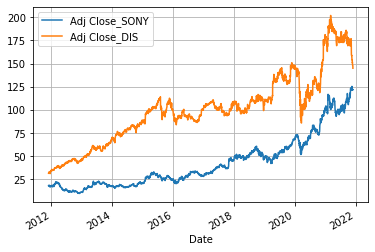

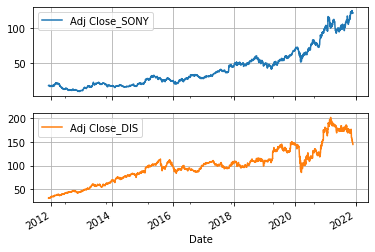

In [14]:
SONY_DIS.plot(grid = True);
#plt.grid()
SONY_DIS.plot(subplots = True, grid = True);
#subplots, grafico delle due serie

In [15]:
# Join PFE e JNJ (settore Health Care )
PFE_JNJ = PFE.join(JNJ, lsuffix = "_PFE", rsuffix = "_JNJ")
PFE_JNJ

,High_PFE,Low_PFE,Open_PFE,Close_PFE,Volume_PFE,Adj Close_PFE,High_JNJ,Low_JNJ,Open_JNJ,Close_JNJ,Volume_JNJ,Adj Close_JNJ
Date,,,,,,,,,,,,
2011-11-30,19.041746,18.519924,18.557875,19.041746,76779895.0,13.022164,64.739998,63.799999,63.919998,64.720001,15032600.0,48.166534
2011-12-01,19.174574,18.870968,19.003796,19.003796,45119527.0,12.996216,64.949997,64.349998,64.680000,64.449997,9852700.0,47.965599
2011-12-02,19.155598,18.851992,19.098673,18.870968,44988093.0,12.905373,64.889999,63.299999,64.870003,63.470001,15792800.0,47.236248
2011-12-05,19.146111,18.719166,19.089184,18.823528,50895236.0,12.872934,64.250000,62.849998,64.099998,63.360001,15294500.0,47.154381
2011-12-06,19.373814,18.927895,19.060720,19.193548,55653835.0,13.125983,63.930000,63.259998,63.610001,63.490002,10417800.0,47.251129
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,51.450001,50.299999,50.580002,51.080002,24946200.0,50.284496,161.000000,158.779999,159.520004,160.690002,7734000.0,158.645645
2021-11-24,51.330002,50.709999,51.180000,50.889999,18556800.0,50.097454,160.619995,159.380005,160.139999,160.240005,5230900.0,158.201370
2021-11-26,54.939999,53.250000,54.040001,54.000000,66561300.0,53.159019,161.160004,158.660004,160.600006,159.199997,8523100.0,157.174591


In [16]:
PFE_JNJ = PFE_JNJ[["Adj Close_PFE", "Adj Close_JNJ"]]
PFE_JNJ

,Adj Close_PFE,Adj Close_JNJ
Date,,
2011-11-30,13.022164,48.166534
2011-12-01,12.996216,47.965599
2011-12-02,12.905373,47.236248
2011-12-05,12.872934,47.154381
2011-12-06,13.125983,47.251129
...,...,...
2021-11-23,50.284496,158.645645
2021-11-24,50.097454,158.201370
2021-11-26,53.159019,157.174591


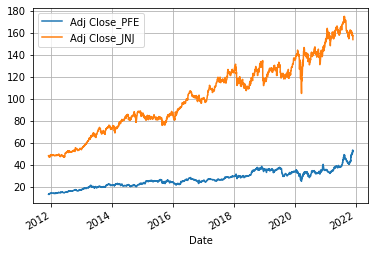

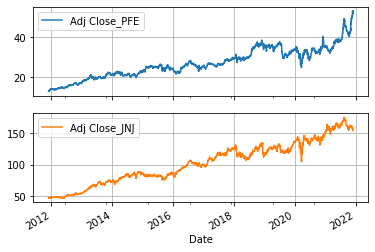

In [17]:
PFE_JNJ.plot(grid = True);
#plt.grid()
PFE_JNJ.plot(subplots = True, grid = True);
#subplots, grafico delle due serie

In [18]:
# Join PFE e JNJ (settore Health Care )
BKNG_EXPE = BKNG.join(EXPE, lsuffix = "_BKNG", rsuffix = "_EXPE")
BKNG_EXPE

,High_BKNG,Low_BKNG,Open_BKNG,Close_BKNG,Volume_BKNG,Adj Close_BKNG,High_EXPE,Low_EXPE,Open_EXPE,Close_EXPE,Volume_EXPE,Adj Close_EXPE
Date,,,,,,,,,,,,
2011-11-30,486.450012,472.940002,478.890015,485.890015,1160900,485.890015,56.380001,55.180000,56.060001,55.639999,2016750.0,37.492008
2011-12-01,493.269989,482.010010,483.869995,488.429993,816400,488.429993,57.000000,55.520000,55.959999,56.060001,1729500.0,37.775017
2011-12-02,498.820007,485.000000,497.420013,486.480011,979100,486.480011,57.759998,56.099998,56.380001,56.200001,2091500.0,37.869354
2011-12-05,495.630005,478.989990,495.630005,484.019989,888000,484.019989,58.660000,56.480000,57.060001,57.840000,1730250.0,38.974430
2011-12-06,485.880005,473.359985,482.769989,479.100006,860700,479.100006,58.020000,57.240002,58.000000,57.619999,1661700.0,38.826191
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,2349.580078,2302.169922,2312.239990,2341.129883,256500,2341.129883,178.429993,173.570007,173.570007,177.970001,1976000.0,177.970001
2021-11-24,2351.260010,2291.149902,2311.959961,2323.120117,295100,2323.120117,179.250000,174.839996,176.960007,176.539993,1196200.0,176.539993
2021-11-26,2162.590088,2099.120117,2121.959961,2155.560059,721800,2155.560059,162.500000,155.589996,161.000000,159.800003,7044700.0,159.800003


In [19]:
BKNG_EXPE = BKNG_EXPE[["Adj Close_BKNG", "Adj Close_EXPE"]]
BKNG_EXPE

,Adj Close_BKNG,Adj Close_EXPE
Date,,
2011-11-30,485.890015,37.492008
2011-12-01,488.429993,37.775017
2011-12-02,486.480011,37.869354
2011-12-05,484.019989,38.974430
2011-12-06,479.100006,38.826191
...,...,...
2021-11-23,2341.129883,177.970001
2021-11-24,2323.120117,176.539993
2021-11-26,2155.560059,159.800003


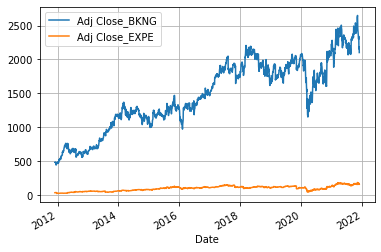

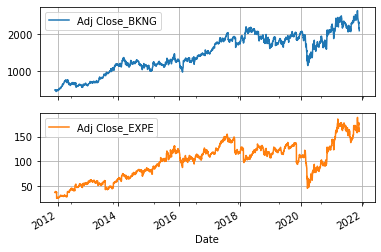

In [20]:
BKNG_EXPE.plot(grid = True);
#plt.grid()
BKNG_EXPE.plot(subplots = True, grid = True);
#subplots, grafico delle due serie

## 2.Statistiche descrittive

### 2.a Calcolare i rendimenti semplici e composti e visualizzarli in un grafico;

In [21]:
SONY_DIS_rtn_semplici = SONY_DIS[["Adj Close_SONY", "Adj Close_DIS"]].pct_change()
SONY_DIS_rtn_semplici.columns = ['rtn_semplici_SONY', 'rtn_semplici_DIS']
SONY_DIS_rtn_semplici

,rtn_semplici_SONY,rtn_semplici_DIS
Date,,
2011-11-30,NaN,NaN
2011-12-01,-0.003324,0.003905
2011-12-02,-0.012229,0.017227
2011-12-05,0.006190,0.009014
2011-12-06,-0.011186,-0.002977
...,...,...
2021-11-23,-0.005065,-0.020304
2021-11-24,0.003613,0.002053
2021-11-26,-0.007773,-0.021343


In [22]:
SONY_DIS_rtn_semplici = SONY_DIS_rtn_semplici.dropna()

In [23]:
SONY_DIS_rtn_semplici.head(10)# modificare i nomi delle colonne

,rtn_semplici_SONY,rtn_semplici_DIS
Date,,
2011-12-01,-0.003324,0.003905
2011-12-02,-0.012229,0.017227
2011-12-05,0.006190,0.009014
2011-12-06,-0.011186,-0.002977
2011-12-07,0.048077,0.007331
2011-12-08,-0.021047,-0.031806
2011-12-09,0.007718,0.017817
2011-12-12,-0.022429,0.002462
2011-12-13,-0.020146,-0.008731


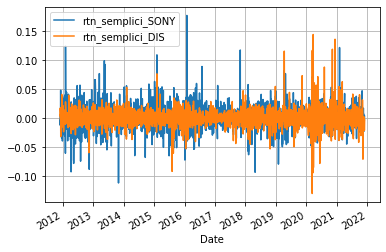

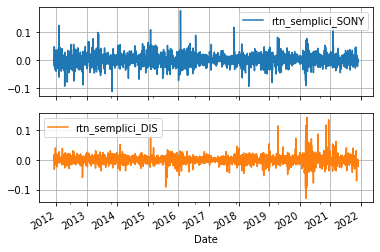

In [24]:
SONY_DIS_rtn_semplici.plot(grid = True);
SONY_DIS_rtn_semplici.plot(subplots = True, grid = True);

In [25]:
SONY_DIS_rtn_composti = (SONY_DIS_rtn_semplici + 1).cumprod()
SONY_DIS_rtn_composti.columns = ['rtn_composti_SONY', 'rtn_composti_DIS']

In [26]:
SONY_DIS_rtn_composti.head(10)

,rtn_composti_SONY,rtn_composti_DIS
Date,,
2011-12-01,0.996676,1.003905
2011-12-02,0.984488,1.021199
2011-12-05,0.990582,1.030404
2011-12-06,0.979501,1.027336
2011-12-07,1.026593,1.034867
2011-12-08,1.004986,1.001952
2011-12-09,1.012742,1.019805
2011-12-12,0.990028,1.022315
2011-12-13,0.970083,1.013389


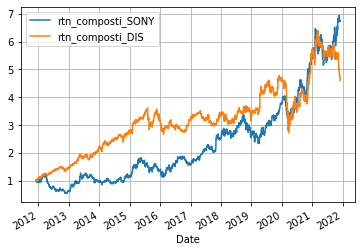

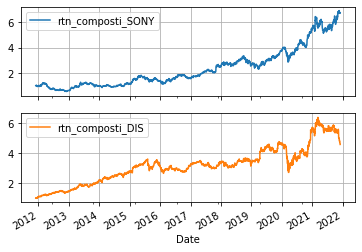

In [27]:
SONY_DIS_rtn_composti.plot(grid = True);
SONY_DIS_rtn_composti.plot(subplots = True, grid = True); # mettere magari il titolo

In [28]:
PFE_JNJ_rtn_semplici = PFE_JNJ[["Adj Close_PFE", "Adj Close_JNJ"]].pct_change()
PFE_JNJ_rtn_semplici.columns = ['rtn_semplici_PFE', 'rtn_semplici_JNJ']
PFE_JNJ_rtn_semplici

,rtn_semplici_PFE,rtn_semplici_JNJ
Date,,
2011-11-30,NaN,NaN
2011-12-01,-0.001993,-0.004172
2011-12-02,-0.006990,-0.015206
2011-12-05,-0.002514,-0.001733
2011-12-06,0.019657,0.002052
...,...,...
2021-11-23,-0.002344,0.006199
2021-11-24,-0.003720,-0.002800
2021-11-26,0.061112,-0.006490


In [29]:
PFE_JNJ_rtn_semplici = PFE_JNJ_rtn_semplici.dropna()
PFE_JNJ_rtn_semplici.head(10)

,rtn_semplici_PFE,rtn_semplici_JNJ
Date,,
2011-12-01,-0.001993,-0.004172
2011-12-02,-0.006990,-0.015206
2011-12-05,-0.002514,-0.001733
2011-12-06,0.019657,0.002052
2011-12-07,0.011863,0.015121
2011-12-08,-0.013679,-0.010396
2011-12-09,0.018326,0.011759
2011-12-12,-0.008269,-0.015807
2011-12-13,0.018146,-0.002362


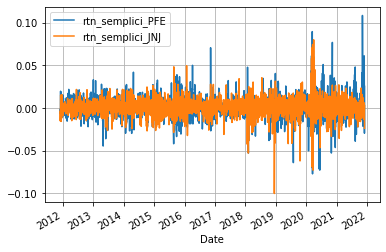

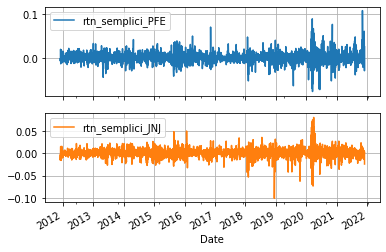

In [30]:
PFE_JNJ_rtn_semplici.plot(grid = True);
PFE_JNJ_rtn_semplici.plot(subplots = True, grid = True);

In [31]:
# Health Care
PFE_JNJ_rtn_composti = (PFE_JNJ_rtn_semplici + 1).cumprod()
PFE_JNJ_rtn_composti.columns = ['rtn_composti_PFE', 'rtn_composti_JNJ']
PFE_JNJ_rtn_composti.head(10)

,rtn_composti_PFE,rtn_composti_JNJ
Date,,
2011-12-01,0.998007,0.995828
2011-12-02,0.991031,0.980686
2011-12-05,0.988540,0.978986
2011-12-06,1.007972,0.980995
2011-12-07,1.019930,0.995828
2011-12-08,1.005979,0.985476
2011-12-09,1.024415,0.997064
2011-12-12,1.015944,0.981304
2011-12-13,1.034380,0.978986


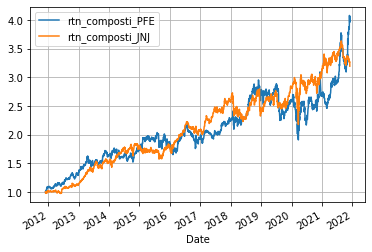

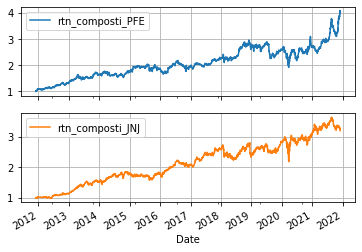

In [32]:
PFE_JNJ_rtn_composti.plot(grid = True);
PFE_JNJ_rtn_composti.plot(subplots = True, grid = True); # mettere magari il titolo

In [33]:
# Transportation
BKNG_EXPE_rtn_semplici = BKNG_EXPE[["Adj Close_BKNG", "Adj Close_EXPE"]].pct_change()
BKNG_EXPE_rtn_semplici.columns = ['rtn_semplici_BKNG', 'rtn_semplici_EXPE']
BKNG_EXPE_rtn_semplici

,rtn_semplici_BKNG,rtn_semplici_EXPE
Date,,
2011-11-30,NaN,NaN
2011-12-01,0.005227,0.007549
2011-12-02,-0.003992,0.002497
2011-12-05,-0.005057,0.029181
2011-12-06,-0.010165,-0.003803
...,...,...
2021-11-23,0.019154,0.027303
2021-11-24,-0.007693,-0.008035
2021-11-26,-0.072127,-0.094823


In [34]:
BKNG_EXPE_rtn_semplici = BKNG_EXPE_rtn_semplici.dropna()
BKNG_EXPE_rtn_semplici.head(10)

,rtn_semplici_BKNG,rtn_semplici_EXPE
Date,,
2011-12-01,0.005227,0.007549
2011-12-02,-0.003992,0.002497
2011-12-05,-0.005057,0.029181
2011-12-06,-0.010165,-0.003803
2011-12-07,0.010833,0.013884
2011-12-08,-0.009973,-0.040054
2011-12-09,0.000584,0.016405
2011-12-12,-0.009067,-0.002456
2011-12-13,-0.026715,-0.017587


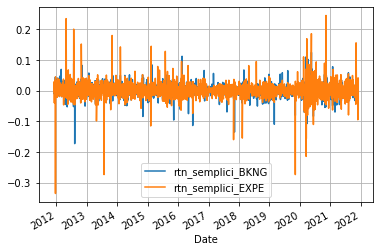

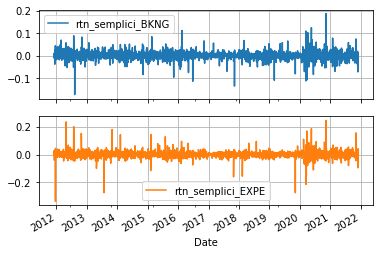

In [35]:
BKNG_EXPE_rtn_semplici.plot(grid = True);
BKNG_EXPE_rtn_semplici.plot(subplots = True, grid = True);

In [36]:
# Ritorni composti
BKNG_EXPE_rtn_composti = (BKNG_EXPE_rtn_semplici + 1).cumprod()
BKNG_EXPE_rtn_composti.columns = ['rtn_composti_BKNG', 'rtn_composti_EXPE']
BKNG_EXPE_rtn_composti.head(10)

,rtn_composti_BKNG,rtn_composti_EXPE
Date,,
2011-12-01,1.005227,1.007549
2011-12-02,1.001214,1.010065
2011-12-05,0.996151,1.039540
2011-12-06,0.986026,1.035586
2011-12-07,0.996707,1.049964
2011-12-08,0.986767,1.007908
2011-12-09,0.987343,1.024443
2011-12-12,0.978390,1.021927
2011-12-13,0.952253,1.003954


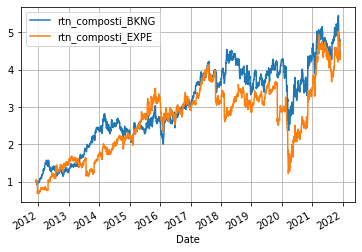

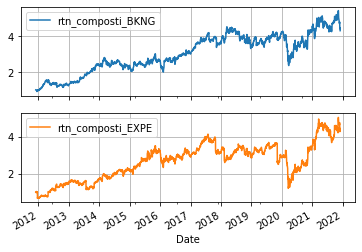

In [37]:
BKNG_EXPE_rtn_composti.plot(grid = True);
BKNG_EXPE_rtn_composti.plot(subplots = True, grid = True); # mettere magari il titolo

### 2.b Commento
FATTO PER DIS E SONY

i. che cosa hanno in comune le serie storiche?
Le serie storiche in relazione ai ritorni composti di Sony e Walt Disney hanno in comune la loro crescrita dal 2020 fino al 2021 e la loro lieve discesa dei rendimenti composti dal 2015 al 2017.
ii. c’è una correlazione positiva fra società dello stesso settore? In questo caso dal grafico dei rendimenti composti possiamo notare che le due società rispettano abbastanza il concetto di correlazione positiva, anche se non del tutto rispettata
iii. ci sono momenti di rendimenti molto lontani dalla media? DA FARE

### 2.c Presentare i rendimenti con istogrammi e confrontare la dispersione dei rendimenti dei diversi titoli

<AxesSubplot:ylabel='Density'>

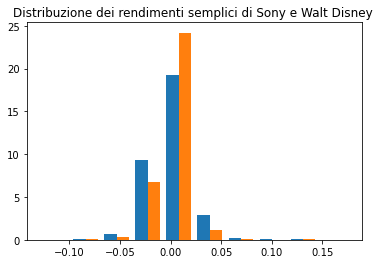

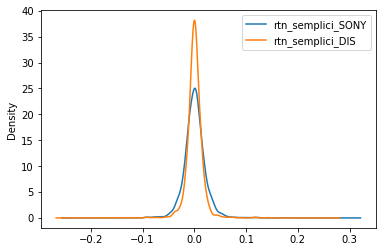

In [38]:
plt.hist(SONY_DIS_rtn_semplici, density = True)
plt.title('Distribuzione dei rendimenti semplici di Sony e Walt Disney ')
labels= ["Sony","Walt Disney"]
#legend1 = plt.legend(handles, labels, loc='upper left')

deviazione_standard = SONY_DIS_rtn_semplici.std()

SONY_DIS_rtn_semplici.plot.density()

In [39]:
deviazione_standard 

rtn_semplici_SONY    0.020335
rtn_semplici_DIS     0.015389
dtype: float64

<AxesSubplot:ylabel='Density'>

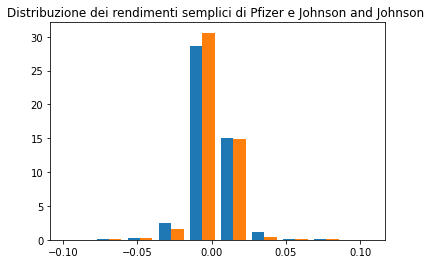

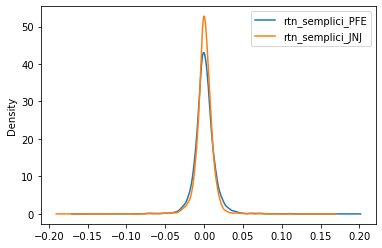

In [40]:
plt.hist(PFE_JNJ_rtn_semplici, density = True)
plt.title('Distribuzione dei rendimenti semplici di Pfizer e Johnson and Johnson ')
labels= ["Pfizer","Johnson and Johnson"]

deviazione_standard = PFE_JNJ_rtn_semplici.std()

PFE_JNJ_rtn_semplici.plot.density()

In [41]:
deviazione_standard 

rtn_semplici_PFE    0.012818
rtn_semplici_JNJ    0.010750
dtype: float64

<AxesSubplot:ylabel='Density'>

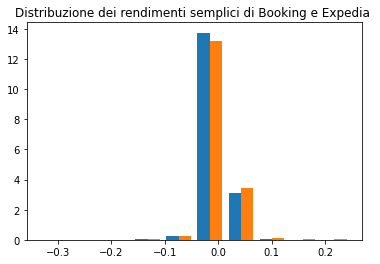

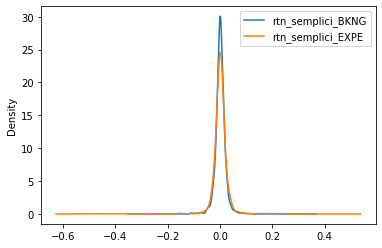

In [42]:
plt.hist(BKNG_EXPE_rtn_semplici, density = True)
plt.title('Distribuzione dei rendimenti semplici di Booking e Expedia ')
labels= ["Booking","Expedia"]

deviazione_standard = BKNG_EXPE_rtn_semplici.std()

BKNG_EXPE_rtn_semplici.plot.density()

In [43]:
deviazione_standard 

rtn_semplici_BKNG    0.019493
rtn_semplici_EXPE    0.026600
dtype: float64

### 2.d Creare grafici diagnostici a 4 sezioni (istogramma, kernel density, boxplot, qq-plot) per ciascuna serie di rendimenti e commentare (i rendimenti sono distribuiti normalmente? Ci sono outliers?)

/home/Richkiller00/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'qq-plot rendimenti semplici di Sony')

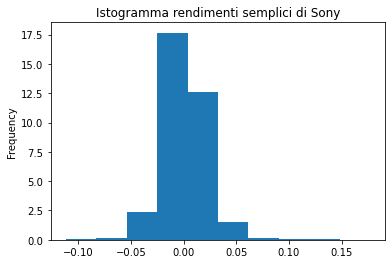

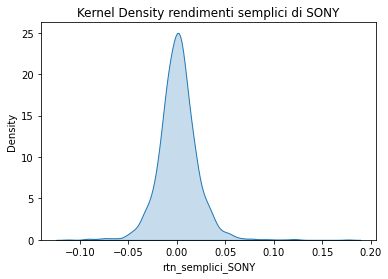

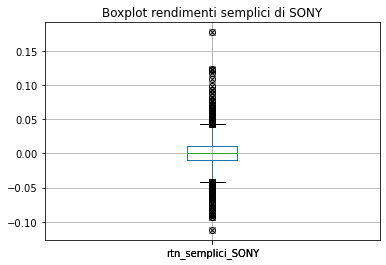

<Figure size 432x288 with 0 Axes>

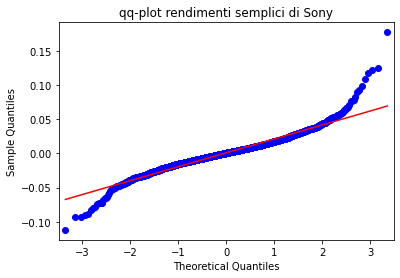

In [44]:
SONY_rtn_semplici = SONY_DIS_rtn_semplici['rtn_semplici_SONY']
plt.figure()
SONY_rtn_semplici.plot(kind='hist', density = True)
plt.title('Istogramma rendimenti semplici di Sony') # istogramma

plt.figure()
import seaborn as sns
sns.kdeplot(SONY_rtn_semplici, shade = True)
plt.title('Kernel Density rendimenti semplici di SONY') # kernel density


plt.figure()
plt.boxplot(SONY_rtn_semplici, sym = 'x') # boxplot
plt.title('Boxplot rendimenti semplici di SONY')
SONY_rtn_semplici.to_frame().boxplot()

plt.figure()
import statsmodels.api as sm
sm.qqplot(SONY_rtn_semplici, line = 's') # qq-plot
plt.title('qq-plot rendimenti semplici di Sony') 

/home/Richkiller00/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'qq-plot rendimenti semplici di DIS')

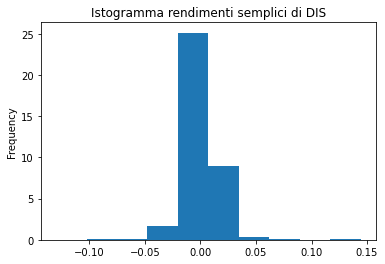

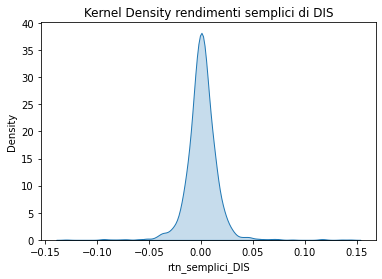

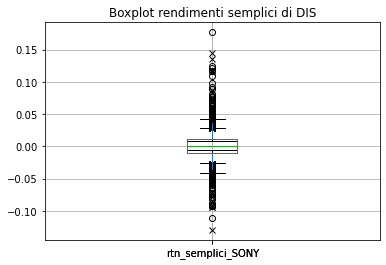

<Figure size 432x288 with 0 Axes>

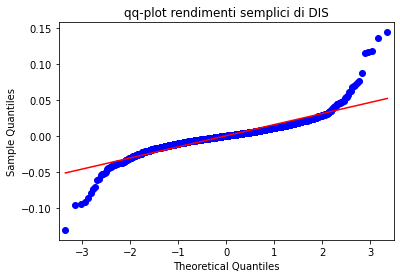

In [45]:
DIS_rtn_semplici = SONY_DIS_rtn_semplici['rtn_semplici_DIS']
plt.figure()
DIS_rtn_semplici.plot(kind='hist', density = True)
plt.title('Istogramma rendimenti semplici di DIS') # istogramma

plt.figure()
sns.kdeplot(data = DIS_rtn_semplici, shade = True)
plt.title('Kernel Density rendimenti semplici di DIS') # kernel density

plt.figure()
plt.boxplot(DIS_rtn_semplici, sym = 'x') # boxplot
plt.title('Boxplot rendimenti semplici di DIS')
SONY_rtn_semplici.to_frame().boxplot()

plt.figure()
sm.qqplot(DIS_rtn_semplici, line = 's') # qq-plot
plt.title('qq-plot rendimenti semplici di DIS') 

/home/Richkiller00/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'qq-plot rendimenti semplici di PFE')

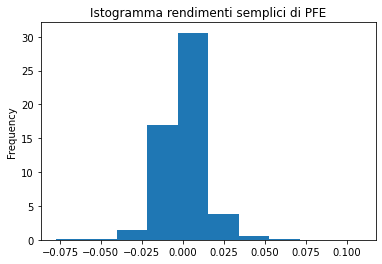

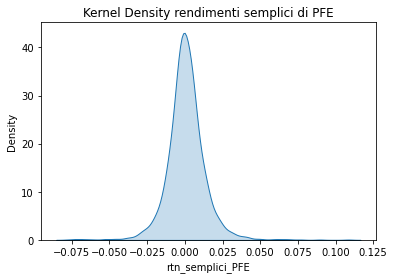

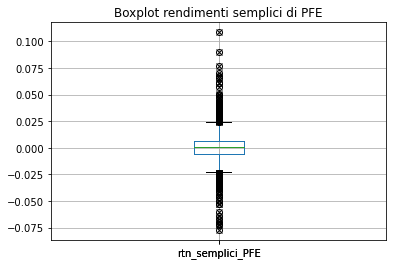

<Figure size 432x288 with 0 Axes>

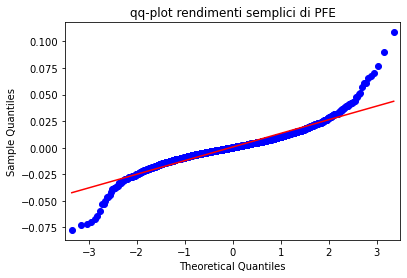

In [46]:
PFE_rtn_semplici = PFE_JNJ_rtn_semplici['rtn_semplici_PFE']
plt.figure()
PFE_rtn_semplici.plot(kind='hist', density = True)
plt.title('Istogramma rendimenti semplici di PFE') # istogramma

plt.figure()
sns.kdeplot(data = PFE_rtn_semplici, shade = True)
plt.title('Kernel Density rendimenti semplici di PFE') # kernel density

plt.figure()
plt.boxplot(PFE_rtn_semplici, sym = 'x') # boxplot
plt.title('Boxplot rendimenti semplici di PFE')
PFE_rtn_semplici.to_frame().boxplot()

plt.figure()
sm.qqplot(PFE_rtn_semplici, line = 's') # qq-plot
plt.title('qq-plot rendimenti semplici di PFE') 

/home/Richkiller00/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'qq-plot rendimenti semplici di JNJ')

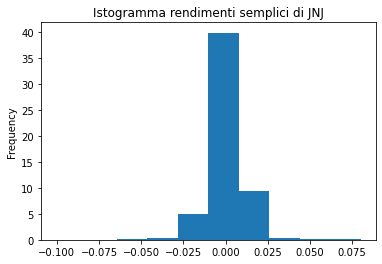

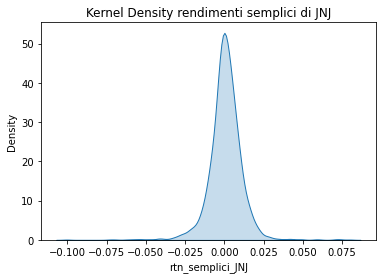

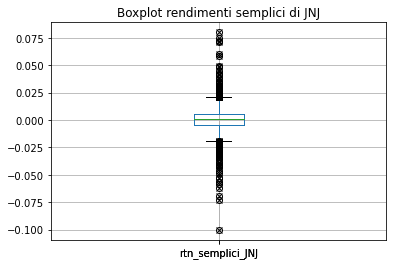

<Figure size 432x288 with 0 Axes>

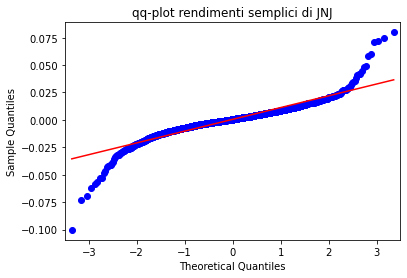

In [47]:
JNJ_rtn_semplici = PFE_JNJ_rtn_semplici['rtn_semplici_JNJ']
plt.figure()
JNJ_rtn_semplici.plot(kind='hist', density = True)
plt.title('Istogramma rendimenti semplici di JNJ') # istogramma

plt.figure()
sns.kdeplot(data = JNJ_rtn_semplici, shade = True)
plt.title('Kernel Density rendimenti semplici di JNJ') # kernel density

plt.figure()
plt.boxplot(JNJ_rtn_semplici, sym = 'x') # boxplot
plt.title('Boxplot rendimenti semplici di JNJ')
JNJ_rtn_semplici.to_frame().boxplot()

plt.figure()
sm.qqplot(JNJ_rtn_semplici, line = 's') # qq-plot
plt.title('qq-plot rendimenti semplici di JNJ')

/home/Richkiller00/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'qq-plot rendimenti semplici di BKNG')

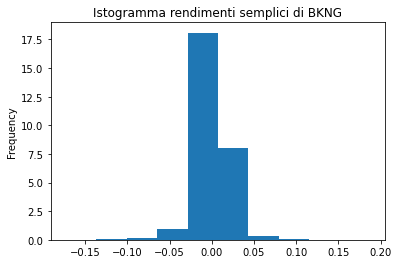

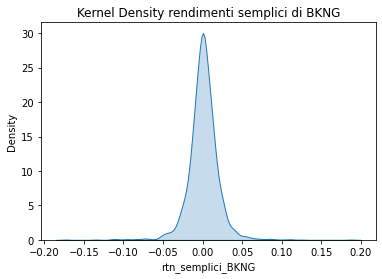

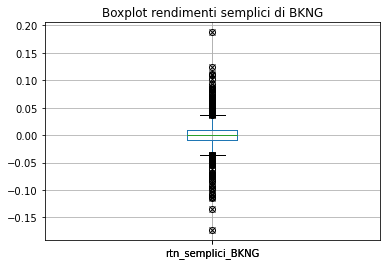

<Figure size 432x288 with 0 Axes>

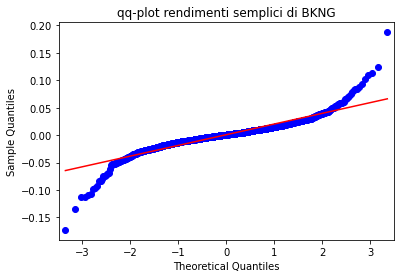

In [48]:
BKNG_rtn_semplici = BKNG_EXPE_rtn_semplici['rtn_semplici_BKNG']
plt.figure()
BKNG_rtn_semplici.plot(kind='hist', density = True)
plt.title('Istogramma rendimenti semplici di BKNG') # istogramma

plt.figure()
sns.kdeplot(data = BKNG_rtn_semplici, shade = True)
plt.title('Kernel Density rendimenti semplici di BKNG') # kernel density

plt.figure()
plt.boxplot(BKNG_rtn_semplici, sym = 'x') # boxplot
plt.title('Boxplot rendimenti semplici di BKNG')
BKNG_rtn_semplici.to_frame().boxplot()

plt.figure()
sm.qqplot(BKNG_rtn_semplici, line = 's') # qq-plot
plt.title('qq-plot rendimenti semplici di BKNG')

/home/Richkiller00/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'qq-plot rendimenti semplici di EXPE')

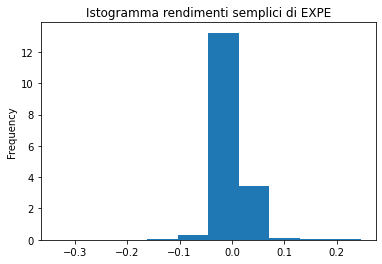

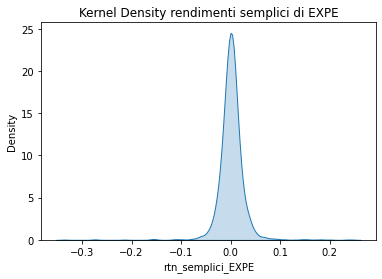

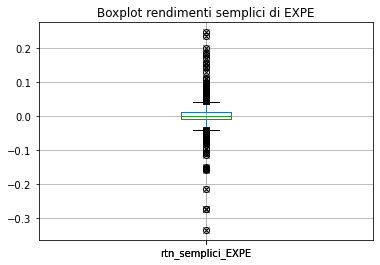

<Figure size 432x288 with 0 Axes>

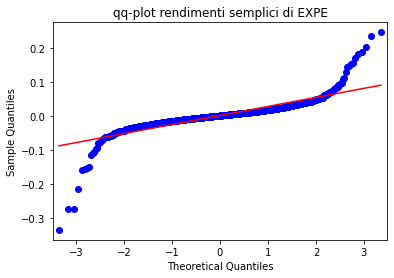

In [49]:
EXPE_rtn_semplici = BKNG_EXPE_rtn_semplici['rtn_semplici_EXPE']
plt.figure()
EXPE_rtn_semplici.plot(kind='hist', density = True)
plt.title('Istogramma rendimenti semplici di EXPE') # istogramma

plt.figure()
sns.kdeplot(data = EXPE_rtn_semplici, shade = True)
plt.title('Kernel Density rendimenti semplici di EXPE') # kernel density

plt.figure()
plt.boxplot(EXPE_rtn_semplici, sym = 'x') # boxplot
plt.title('Boxplot rendimenti semplici di EXPE')
EXPE_rtn_semplici.to_frame().boxplot()

plt.figure()
sm.qqplot(EXPE_rtn_semplici, line = 's') # qq-plot
plt.title('qq-plot rendimenti semplici di EXPE')

# USARE RENDIMENTI SEMPLICI O COMPOSTI??
# FARE COMMENTI

### 2.e Calcolare statistiche descrittive univariate (media, varianza, deviazione standard, asimmetria, curtosi) per ogni serie di rendimenti e commentare.
USO I RENDIMENTI SEMPLICI, magari creare un dataset per vedere la risposta

In [50]:
#STATISTICHE SONY
media = round(SONY_rtn_semplici.mean(), 4)
varianza = round(SONY_rtn_semplici.var(), 4)
deviazione = round(SONY_rtn_semplici.std(), 4)
asimmetria = round(SONY_rtn_semplici.skew(), 4)
kurtosi = round(SONY_rtn_semplici.kurtosis(), 4)

print("STATISTICHE SONY: ")
print("MEDIA" + ": " + str(media))
print("VARIANZA" + ": " + str(varianza))
print("DEVIAZIONE" + ": " + str(deviazione))
print("ASIMMETRIA" + ": " + str(asimmetria))
print("KURTOSI" + ": " + str(kurtosi))

STATISTICHE SONY: 
MEDIA: 0.001
VARIANZA: 0.0004
DEVIAZIONE: 0.0203
ASIMMETRIA: 0.4671
KURTOSI: 5.9656


In [51]:
# COMMENTO

In [52]:
#STATISTICHE walt disney (DIS)
media = round(DIS_rtn_semplici.mean(), 4)
varianza = round(DIS_rtn_semplici.var(), 4)
deviazione = round(DIS_rtn_semplici.std(), 4)
asimmetria = round(DIS_rtn_semplici.skew(), 4)
kurtosi = round(DIS_rtn_semplici.kurtosis(), 4)

print("STATISTICHE DIS: ")
print("MEDIA" + ": " + str(media))
print("VARIANZA" + ": " + str(varianza))
print("DEVIAZIONE" + ": " + str(deviazione))
print("ASIMMETRIA" + ": " + str(asimmetria))
print("KURTOSI" + ": " + str(kurtosi))

STATISTICHE DIS: 
MEDIA: 0.0007
VARIANZA: 0.0002
DEVIAZIONE: 0.0154
ASIMMETRIA: 0.6097
KURTOSI: 15.1366


In [53]:
# COMMENTO

In [54]:
#STATISTICHE pfizer (PFE)
media = round(PFE_rtn_semplici.mean(), 4)
varianza = round(PFE_rtn_semplici.var(), 4)
deviazione = round(PFE_rtn_semplici.std(), 4)
asimmetria = round(PFE_rtn_semplici.skew(), 4)
kurtosi = round(PFE_rtn_semplici.kurtosis(), 4)

print("STATISTICHE PFE: ")
print("MEDIA" + ": " + str(media))
print("VARIANZA" + ": " + str(varianza))
print("DEVIAZIONE" + ": " + str(deviazione))
print("ASIMMETRIA" + ": " + str(asimmetria))
print("KURTOSI" + ": " + str(kurtosi))

STATISTICHE PFE: 
MEDIA: 0.0006
VARIANZA: 0.0002
DEVIAZIONE: 0.0128
ASIMMETRIA: 0.3442
KURTOSI: 7.7192


In [55]:
# COMMENTO

In [56]:
#STATISTICHE johnson and johnson (JNJ)
media = round(JNJ_rtn_semplici.mean(), 4)
varianza = round(JNJ_rtn_semplici.var(), 4)
deviazione = round(JNJ_rtn_semplici.std(), 4)
asimmetria = round(JNJ_rtn_semplici.skew(), 4)
kurtosi = round(JNJ_rtn_semplici.kurtosis(), 4)

print("STATISTICHE JNJ: ")
print("MEDIA" + ": " + str(media))
print("VARIANZA" + ": " + str(varianza))
print("DEVIAZIONE" + ": " + str(deviazione))
print("ASIMMETRIA" + ": " + str(asimmetria))
print("KURTOSI" + ": " + str(kurtosi))

STATISTICHE JNJ: 
MEDIA: 0.0005
VARIANZA: 0.0001
DEVIAZIONE: 0.0107
ASIMMETRIA: -0.3355
KURTOSI: 11.2652


In [57]:
# COMMENTO

In [58]:
#STATISTICHE booking (BKNG)
media = round(BKNG_rtn_semplici.mean(), 4)
varianza = round(BKNG_rtn_semplici.var(), 4)
deviazione = round(BKNG_rtn_semplici.std(), 4)
asimmetria = round(BKNG_rtn_semplici.skew(), 4)
kurtosi = round(BKNG_rtn_semplici.kurtosis(), 4)

print("STATISTICHE BKNG: ")
print("MEDIA" + ": " + str(media))
print("VARIANZA" + ": " + str(varianza))
print("DEVIAZIONE" + ": " + str(deviazione))
print("ASIMMETRIA" + ": " + str(asimmetria))
print("KURTOSI" + ": " + str(kurtosi))

STATISTICHE BKNG: 
MEDIA: 0.0008
VARIANZA: 0.0004
DEVIAZIONE: 0.0195
ASIMMETRIA: -0.1067
KURTOSI: 11.9975


In [59]:
# COMMENTO

In [60]:
#STATISTICHE expedia (EXPE)
media = round(EXPE_rtn_semplici.mean(), 4)
varianza = round(EXPE_rtn_semplici.var(), 4)
deviazione = round(EXPE_rtn_semplici.std(), 4)
asimmetria = round(EXPE_rtn_semplici.skew(), 4)
kurtosi = round(EXPE_rtn_semplici.kurtosis(), 4)

print("STATISTICHE EXPE: ")
print("MEDIA" + ": " + str(media))
print("VARIANZA" + ": " + str(varianza))
print("DEVIAZIONE" + ": " + str(deviazione))
print("ASIMMETRIA" + ": " + str(asimmetria))
print("KURTOSI" + ": " + str(kurtosi))

STATISTICHE EXPE: 
MEDIA: 0.0009
VARIANZA: 0.0007
DEVIAZIONE: 0.0266
ASIMMETRIA: -0.7547
KURTOSI: 32.9237


In [61]:
# COMMENTO

### 2.f Calcolare la matrice di varianze/covarianze dei rendimenti e commentare le relazioni fra i diversi titoli. Qual é più rischioso?

In [62]:
# NON È UNA MATRICE, BHO
Varianze = pd.DataFrame()
Varianze[['Varianza_SONY','Varianza_DIS']] =  SONY_DIS_rtn_semplici[['rtn_semplici_SONY','rtn_semplici_DIS']]
Varianze.var()

Varianza_SONY    0.000414
Varianza_DIS     0.000237
dtype: float64

In [63]:
Covarianze = pd.DataFrame()
Covarianze[['Covarianze_SONY','Covarianze_DIS']] =  SONY_DIS_rtn_semplici[['rtn_semplici_SONY','rtn_semplici_DIS']]
Covarianze.cov()

,Covarianze_SONY,Covarianze_DIS
Covarianze_SONY,0.000414,0.000104
Covarianze_DIS,0.000104,0.000237


In [64]:
# COMMENTO

In [65]:
Varianze = pd.DataFrame()
Varianze[['Varianza_PFE','Varianza_JNJ']] =  PFE_JNJ_rtn_semplici[['rtn_semplici_PFE','rtn_semplici_JNJ']]
Varianze.var()

Varianza_PFE    0.000164
Varianza_JNJ    0.000116
dtype: float64

In [66]:
Covarianze = pd.DataFrame()
Covarianze[['Covarianze_PFE','Covarianze_JNJ']] =  PFE_JNJ_rtn_semplici[['rtn_semplici_PFE','rtn_semplici_JNJ']]
Covarianze.cov()

,Covarianze_PFE,Covarianze_JNJ
Covarianze_PFE,0.000164,0.000076
Covarianze_JNJ,0.000076,0.000116


In [67]:
# COMMENTO

In [68]:
Varianze = pd.DataFrame()
Varianze[['Varianza_BKNG','Varianza_EXPE']] =  BKNG_EXPE_rtn_semplici[['rtn_semplici_BKNG','rtn_semplici_EXPE']]
Varianze.var()

Varianza_BKNG    0.000380
Varianza_EXPE    0.000708
dtype: float64

In [69]:
Covarianze = pd.DataFrame()
Covarianze[['Varianza_BKNG','Varianza_EXPE']] =  BKNG_EXPE_rtn_semplici[['rtn_semplici_BKNG','rtn_semplici_EXPE']]
Covarianze.cov()

,Varianza_BKNG,Varianza_EXPE
Varianza_BKNG,0.000380,0.000316
Varianza_EXPE,0.000316,0.000708


In [70]:
# COMMENTO

### 2.g Calcolare la matrice di correlazione dei rendimenti
FREQUENZA MENSILE, VEDERE SE I RITORNI SONO GIUSTI, ECC, METTERE TUTTO DENTRO

In [71]:
Correlazione = pd.DataFrame()
Correlazione[['Correlazione_SONY','Correlazioni_DIS']] =  SONY_DIS_rtn_semplici[['rtn_semplici_SONY','rtn_semplici_DIS']]
Correlazione.corr()

,Correlazione_SONY,Correlazioni_DIS
Correlazione_SONY,1.000000,0.332251
Correlazioni_DIS,0.332251,1.000000


In [72]:
# COMMENTO

In [73]:
Correlazione = pd.DataFrame()
Correlazione[['Correlazione_PFE','Correlazioni_JNJ']] =  PFE_JNJ_rtn_semplici[['rtn_semplici_PFE','rtn_semplici_JNJ']]
Correlazione.corr()

,Correlazione_PFE,Correlazioni_JNJ
Correlazione_PFE,1.000000,0.551325
Correlazioni_JNJ,0.551325,1.000000


In [74]:
# COMMENTO

In [75]:
Correlazione = pd.DataFrame()
Correlazione[['Correlazione_BKNG','Correlazioni_EXPE']] =  BKNG_EXPE_rtn_semplici[['rtn_semplici_BKNG','rtn_semplici_EXPE']]
Correlazione.corr()

,Correlazione_BKNG,Correlazioni_EXPE
Correlazione_BKNG,1.000000,0.609731
Correlazioni_EXPE,0.609731,1.000000


In [76]:
# COMMENTO

### 3. Analisi di previsione

Costruire un modello di previsione (ARIMA, SVM o altro) per prevedere i prezzi o rendimenti di ciascun strumento finanziario, usando:
- n (80) mesi come training set
- m (30) mesi come test set
- l (10) mesi per la validazione
- Utilizzare gli ultimi l (10) mesi per confrontare le previsioni con i valori effettivi

In [77]:
# previsione con ARIMA (DIS)
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

In [78]:
DIS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-11-30,35.889999,34.660000,34.680000,35.849998,16536000.0,31.567966
2011-12-01,36.330002,35.720001,36.029999,35.990002,10350800.0,31.691235
2011-12-02,36.830002,36.299999,36.330002,36.610001,10202500.0,32.237186
2011-12-05,37.369999,36.730000,37.040001,36.939999,9973900.0,32.527767
2011-12-06,37.200001,36.750000,36.869999,36.830002,6573100.0,32.430916


In [79]:
DIS_Adj_Close = DIS['Adj Close']

### 5. CAPM
- Calcolare il beta di ciascun titolo rispetto al mercato (indice S&P 500, ticker Yahoo Finance ^GSPC)

In [80]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm
from datetime import date, datetime
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

DISNEY (DIS)

In [81]:
risky_asset = 'DIS' # Disney
market_benchmark = '^GSPC' # S&P 500
start_date = '2011-11-30'
end_date = '2021-11-30'

In [82]:
# DIS
df_DIS = web.get_data_yahoo([risky_asset, market_benchmark],
                       start = start_date, end = end_date)

In [83]:
df_DIS.head()

Attributes  Adj Close                   Close                    High  \
Symbols           DIS        ^GSPC        DIS        ^GSPC        DIS   
Date                                                                    
2011-11-30  31.567965  1246.959961  35.849998  1246.959961  35.889999   
2011-12-01  31.691248  1244.579956  35.990002  1244.579956  36.330002   
2011-12-02  32.237194  1244.280029  36.610001  1244.280029  36.830002   
2011-12-05  32.527775  1257.079956  36.939999  1257.079956  37.369999   
2011-12-06  32.430904  1258.469971  36.830002  1258.469971  37.200001   

Attributes                     Low                    Open               \
Symbols           ^GSPC        DIS        ^GSPC        DIS        ^GSPC   
Date                                                                      
2011-11-30  1247.109985  34.660000  1196.719971  34.680000  1196.719971   
2011-12-01  1251.089966  35.720001  1239.729980  36.029999  1246.910034   
2011-12-02  1260.079956  36.299999  1243.349976  36.330002  1246.030029   
2011-12-05  1266.729980  36.730000  1244.329956  37.040001  1244.329956   
2011-12-06  1266.030029  36.750000  1253.030029  36.869999  1257.189941   

Attributes      Volume                
Symbols            DIS         ^GSPC  
Date                                  
2011-11-30  16536000.0  5.801910e+09  
2011-12-01  10350800.0  3.818680e+09  
2011-12-02  10202500.0  4.144310e+09  
2011-12-05   9973900.0  4.148060e+09  
2011-12-06   6573100.0  3.734230e+09

In [84]:
X = df_DIS['Adj Close'].rename(columns={risky_asset:'asset', market_benchmark:'market'})\
.resample('M').last().pct_change().dropna()


In [85]:
X.head()

Symbols,asset,market
Date,,
2011-12-31,0.063591,0.008533
2012-01-31,0.037333,0.043583
2012-02-29,0.079434,0.040589
2012-03-31,0.042629,0.031332
2012-04-30,-0.015304,-0.007497


In [86]:
X.cov()

Symbols,asset,market
Symbols,,
asset,0.004586,0.001683
market,0.001683,0.001415


In [87]:
covariance = X.cov().iloc[0,1] # si prende la varianza di market

In [88]:
benchmark_variance = X.market.var()

In [89]:
X.market.var()

0.0014154534392805914

In [90]:
beta_DIS = covariance / benchmark_variance
beta_DIS

1.1888776949956281

SONY

In [91]:
risky_asset = 'SONY' # SONY
df_SONY = web.get_data_yahoo([risky_asset, market_benchmark],
                       start = start_date, end = end_date)

In [92]:
df_SONY.head(10)

Attributes  Adj Close                   Close                    High  \
Symbols          SONY        ^GSPC       SONY        ^GSPC       SONY   
Date                                                                    
2011-11-30  18.049999  1246.959961  18.049999  1246.959961  18.200001   
2011-12-01  17.990000  1244.579956  17.990000  1244.579956  18.100000   
2011-12-02  17.770000  1244.280029  17.770000  1244.280029  18.070000   
2011-12-05  17.879999  1257.079956  17.879999  1257.079956  18.040001   
2011-12-06  17.680000  1258.469971  17.680000  1258.469971  17.799999   
2011-12-07  18.530001  1261.010010  18.530001  1261.010010  18.610001   
2011-12-08  18.139999  1234.349976  18.139999  1234.349976  18.559999   
2011-12-09  18.280001  1255.189941  18.280001  1255.189941  18.290001   
2011-12-12  17.870001  1236.469971  17.870001  1236.469971  18.020000   
2011-12-13  17.510000  1225.729980  17.510000  1225.729980  17.930000   

Attributes                     Low                    Open               \
Symbols           ^GSPC       SONY        ^GSPC       SONY        ^GSPC   
Date                                                                      
2011-11-30  1247.109985  17.969999  1196.719971  18.000000  1196.719971   
2011-12-01  1251.089966  17.900000  1239.729980  17.980000  1246.910034   
2011-12-02  1260.079956  17.700001  1243.349976  18.070000  1246.030029   
2011-12-05  1266.729980  17.750000  1244.329956  17.889999  1244.329956   
2011-12-06  1266.030029  17.549999  1253.030029  17.799999  1257.189941   
2011-12-07  1267.060059  18.389999  1244.800049  18.480000  1258.140015   
2011-12-08  1260.869995  18.080000  1231.469971  18.500000  1260.869995   
2011-12-09  1258.250000  17.990000  1234.479980  18.120001  1234.479980   
2011-12-12  1255.050049  17.700001  1227.250000  18.020000  1255.050049   
2011-12-13  1249.859985  17.400000  1219.430054  17.870001  1236.829956   

Attributes   Volume              
Symbols        SONY       ^GSPC  
Date                             
2011-11-30  2011700  5801910000  
2011-12-01  1078500  3818680000  
2011-12-02  1178100  4144310000  
2011-12-05   587300  4148060000  
2011-12-06   616100  3734230000  
2011-12-07  1975400  4160540000  
2011-12-08  1469200  4298370000  
2011-12-09  2168300  3830610000  
2011-12-12   840500  3600570000  
2011-12-13   963900  4121570000

In [93]:
X = df_SONY['Adj Close'].rename(columns={risky_asset:'asset', market_benchmark:'market'})\
.resample('M').last().pct_change().dropna()

In [94]:
X.cov()

Symbols,asset,market
Symbols,,
asset,0.008903,0.001563
market,0.001563,0.001415


In [95]:
covariance = X.cov().iloc[0,1] # si prende la varianza di market
benchmark_variance = X.market.var()
benchmark_variance

0.0014154534392805914

In [96]:
beta_SONY = covariance / benchmark_variance
beta_SONY

1.1043057680597492

PFIZER (PFE)

In [97]:
risky_asset = 'PFE' # PFIZER
df_PFE = web.get_data_yahoo([risky_asset, market_benchmark],
                       start = start_date, end = end_date)

In [98]:
df_PFE.head(10)

Attributes  Adj Close                   Close                    High  \
Symbols           PFE        ^GSPC        PFE        ^GSPC        PFE   
Date                                                                    
2011-11-30  13.022168  1246.959961  19.041746  1246.959961  19.041746   
2011-12-01  12.996212  1244.579956  19.003796  1244.579956  19.174574   
2011-12-02  12.905375  1244.280029  18.870968  1244.280029  19.155598   
2011-12-05  12.872930  1257.079956  18.823528  1257.079956  19.146111   
2011-12-06  13.125978  1258.469971  19.193548  1258.469971  19.373814   
2011-12-07  13.281697  1261.010010  19.421251  1261.010010  19.573055   
2011-12-08  13.100026  1234.349976  19.155598  1234.349976  19.487665   
2011-12-09  13.340095  1255.189941  19.506641  1255.189941  19.611006   
2011-12-12  13.229791  1236.469971  19.345350  1236.469971  19.497154   
2011-12-13  13.469863  1225.729980  19.696396  1225.729980  19.886148   

Attributes                     Low                    Open               \
Symbols           ^GSPC        PFE        ^GSPC        PFE        ^GSPC   
Date                                                                      
2011-11-30  1247.109985  18.519924  1196.719971  18.557875  1196.719971   
2011-12-01  1251.089966  18.870968  1239.729980  19.003796  1246.910034   
2011-12-02  1260.079956  18.851992  1243.349976  19.098673  1246.030029   
2011-12-05  1266.729980  18.719166  1244.329956  19.089184  1244.329956   
2011-12-06  1266.030029  18.927895  1253.030029  19.060720  1257.189941   
2011-12-07  1267.060059  19.070210  1244.800049  19.089184  1258.140015   
2011-12-08  1260.869995  19.089184  1231.469971  19.278936  1260.869995   
2011-12-09  1258.250000  19.203035  1234.479980  19.259962  1234.479980   
2011-12-12  1255.050049  19.193548  1227.250000  19.335863  1255.050049   
2011-12-13  1249.859985  19.459204  1219.430054  19.516129  1236.829956   

Attributes      Volume                
Symbols            PFE         ^GSPC  
Date                                  
2011-11-30  76779895.0  5.801910e+09  
2011-12-01  45119527.0  3.818680e+09  
2011-12-02  44988093.0  4.144310e+09  
2011-12-05  50895236.0  4.148060e+09  
2011-12-06  55653835.0  3.734230e+09  
2011-12-07  50414823.0  4.160540e+09  
2011-12-08  37986265.0  4.298370e+09  
2011-12-09  45843098.0  3.830610e+09  
2011-12-12  42414119.0  3.600570e+09  
2011-12-13  72990449.0  4.121570e+09

In [99]:
X = df_PFE['Adj Close'].rename(columns={risky_asset:'asset', market_benchmark:'market'})\
.resample('M').last().pct_change().dropna()

In [100]:
X.cov()

Symbols,asset,market
Symbols,,
asset,0.003335,0.001070
market,0.001070,0.001415


In [101]:
covariance = X.cov().iloc[0,1] # si prende la varianza di market
benchmark_variance = X.market.var()
benchmark_variance

0.0014154534392805914

In [102]:
beta_PFE = covariance / benchmark_variance
beta_PFE

0.7559655628078307

JOHNSON AND JOHNSON (JNJ)

In [103]:
risky_asset = 'JNJ' # JOHNSON AND JOHNSON
df_JNJ = web.get_data_yahoo([risky_asset, market_benchmark],
                       start = start_date, end = end_date)
df_JNJ.head(10)

Attributes  Adj Close                   Close                    High  \
Symbols           JNJ        ^GSPC        JNJ        ^GSPC        JNJ   
Date                                                                    
2011-11-30  48.166523  1246.959961  64.720001  1246.959961  64.739998   
2011-12-01  47.965588  1244.579956  64.449997  1244.579956  64.949997   
2011-12-02  47.236244  1244.280029  63.470001  1244.280029  64.889999   
2011-12-05  47.154385  1257.079956  63.360001  1257.079956  64.250000   
2011-12-06  47.251129  1258.469971  63.490002  1258.469971  63.930000   
2011-12-07  47.965588  1261.010010  64.449997  1261.010010  64.809998   
2011-12-08  47.466946  1234.349976  63.779999  1234.349976  64.449997   
2011-12-09  48.025127  1255.189941  64.529999  1255.189941  64.680000   
2011-12-12  47.266014  1236.469971  63.509998  1236.469971  64.199997   
2011-12-13  47.154385  1225.729980  63.360001  1225.729980  64.080002   

Attributes                     Low                    Open               \
Symbols           ^GSPC        JNJ        ^GSPC        JNJ        ^GSPC   
Date                                                                      
2011-11-30  1247.109985  63.799999  1196.719971  63.919998  1196.719971   
2011-12-01  1251.089966  64.349998  1239.729980  64.680000  1246.910034   
2011-12-02  1260.079956  63.299999  1243.349976  64.870003  1246.030029   
2011-12-05  1266.729980  62.849998  1244.329956  64.099998  1244.329956   
2011-12-06  1266.030029  63.259998  1253.030029  63.610001  1257.189941   
2011-12-07  1267.060059  63.369999  1244.800049  63.570000  1258.140015   
2011-12-08  1260.869995  63.560001  1231.469971  64.139999  1260.869995   
2011-12-09  1258.250000  63.980000  1234.479980  64.320000  1234.479980   
2011-12-12  1255.050049  63.349998  1227.250000  63.869999  1255.050049   
2011-12-13  1249.859985  63.139999  1219.430054  64.080002  1236.829956   

Attributes      Volume                
Symbols            JNJ         ^GSPC  
Date                                  
2011-11-30  15032600.0  5.801910e+09  
2011-12-01   9852700.0  3.818680e+09  
2011-12-02  15792800.0  4.144310e+09  
2011-12-05  15294500.0  4.148060e+09  
2011-12-06  10417800.0  3.734230e+09  
2011-12-07  11504700.0  4.160540e+09  
2011-12-08   9566800.0  4.298370e+09  
2011-12-09   8835700.0  3.830610e+09  
2011-12-12  10808700.0  3.600570e+09  
2011-12-13  14215500.0  4.121570e+09

In [104]:
X = df_JNJ['Adj Close'].rename(columns={risky_asset:'asset', market_benchmark:'market'})\
.resample('M').last().pct_change().dropna()
X.cov()

Symbols,asset,market
Symbols,,
asset,0.001819,0.001019
market,0.001019,0.001415


In [105]:
covariance = X.cov().iloc[0,1] # si prende la varianza di market
benchmark_variance = X.market.var()
benchmark_variance

0.0014154534392805914

In [106]:
beta_JNJ = covariance / benchmark_variance
beta_JNJ

0.7200190006012794

BOOKING (BKNG)

In [107]:
risky_asset = 'BKNG' # BOOKING
df_BKNG = web.get_data_yahoo([risky_asset, market_benchmark],
                       start = start_date, end = end_date)
df_BKNG.head(10)

Attributes   Adj Close                    Close                     High  \
Symbols           BKNG        ^GSPC        BKNG        ^GSPC        BKNG   
Date                                                                       
2011-11-30  485.890015  1246.959961  485.890015  1246.959961  486.450012   
2011-12-01  488.429993  1244.579956  488.429993  1244.579956  493.269989   
2011-12-02  486.480011  1244.280029  486.480011  1244.280029  498.820007   
2011-12-05  484.019989  1257.079956  484.019989  1257.079956  495.630005   
2011-12-06  479.100006  1258.469971  479.100006  1258.469971  485.880005   
2011-12-07  484.290009  1261.010010  484.290009  1261.010010  486.390015   
2011-12-08  479.459991  1234.349976  479.459991  1234.349976  486.000000   
2011-12-09  479.739990  1255.189941  479.739990  1255.189941  482.000000   
2011-12-12  475.390015  1236.469971  475.390015  1236.469971  476.269989   
2011-12-13  462.690002  1225.729980  462.690002  1225.729980  481.660004   

Attributes                      Low                     Open               \
Symbols           ^GSPC        BKNG        ^GSPC        BKNG        ^GSPC   
Date                                                                        
2011-11-30  1247.109985  472.940002  1196.719971  478.890015  1196.719971   
2011-12-01  1251.089966  482.010010  1239.729980  483.869995  1246.910034   
2011-12-02  1260.079956  485.000000  1243.349976  497.420013  1246.030029   
2011-12-05  1266.729980  478.989990  1244.329956  495.630005  1244.329956   
2011-12-06  1266.030029  473.359985  1253.030029  482.769989  1257.189941   
2011-12-07  1267.060059  472.000000  1244.800049  476.709991  1258.140015   
2011-12-08  1260.869995  477.000000  1231.469971  482.859985  1260.869995   
2011-12-09  1258.250000  474.380005  1234.479980  480.000000  1234.479980   
2011-12-12  1255.050049  468.000000  1227.250000  474.500000  1255.050049   
2011-12-13  1249.859985  461.399994  1219.430054  476.140015  1236.829956   

Attributes   Volume              
Symbols        BKNG       ^GSPC  
Date                             
2011-11-30  1160900  5801910000  
2011-12-01   816400  3818680000  
2011-12-02   979100  4144310000  
2011-12-05   888000  4148060000  
2011-12-06   860700  3734230000  
2011-12-07   994100  4160540000  
2011-12-08   860600  4298370000  
2011-12-09   762900  3830610000  
2011-12-12   629400  3600570000  
2011-12-13   805600  4121570000

In [108]:
X = df_BKNG['Adj Close'].rename(columns={risky_asset:'asset', market_benchmark:'market'})\
.resample('M').last().pct_change().dropna()
X.cov()

Symbols,asset,market
Symbols,,
asset,0.007476,0.001905
market,0.001905,0.001415


In [109]:
covariance = X.cov().iloc[0,1] # si prende la varianza di market
benchmark_variance = X.market.var()
benchmark_variance

0.0014154534392805914

In [110]:
beta_BKNG = covariance / benchmark_variance
beta_BKNG

1.3458383472948487

EXPEDIA (EXPE)

In [111]:
risky_asset = 'EXPE' # EXPEDIA
df_EXPE = web.get_data_yahoo([risky_asset, market_benchmark],
                       start = start_date, end = end_date)
df_EXPE.head(10)

Attributes  Adj Close                   Close                    High  \
Symbols          EXPE        ^GSPC       EXPE        ^GSPC       EXPE   
Date                                                                    
2011-11-30  37.492001  1246.959961  55.639999  1246.959961  56.380001   
2011-12-01  37.775013  1244.579956  56.060001  1244.579956  57.000000   
2011-12-02  37.869347  1244.280029  56.200001  1244.280029  57.759998   
2011-12-05  38.974438  1257.079956  57.840000  1257.079956  58.660000   
2011-12-06  38.826195  1258.469971  57.619999  1258.469971  58.020000   
2011-12-07  39.365246  1261.010010  58.419998  1261.010010  59.080002   
2011-12-08  37.788494  1234.349976  56.080002  1234.349976  57.799999   
2011-12-09  38.408409  1255.189941  57.000000  1255.189941  57.660000   
2011-12-12  38.314083  1236.469971  56.860001  1236.469971  56.919998   
2011-12-13  37.640251  1225.729980  55.860001  1225.729980  57.639999   

Attributes                     Low                    Open               \
Symbols           ^GSPC       EXPE        ^GSPC       EXPE        ^GSPC   
Date                                                                      
2011-11-30  1247.109985  55.180000  1196.719971  56.060001  1196.719971   
2011-12-01  1251.089966  55.520000  1239.729980  55.959999  1246.910034   
2011-12-02  1260.079956  56.099998  1243.349976  56.380001  1246.030029   
2011-12-05  1266.729980  56.480000  1244.329956  57.060001  1244.329956   
2011-12-06  1266.030029  57.240002  1253.030029  58.000000  1257.189941   
2011-12-07  1267.060059  56.480000  1244.800049  57.340000  1258.140015   
2011-12-08  1260.869995  55.419998  1231.469971  56.619999  1260.869995   
2011-12-09  1258.250000  56.060001  1234.479980  56.160000  1234.479980   
2011-12-12  1255.050049  56.220001  1227.250000  56.599998  1255.050049   
2011-12-13  1249.859985  55.639999  1219.430054  57.279999  1236.829956   

Attributes     Volume                
Symbols          EXPE         ^GSPC  
Date                                 
2011-11-30  2016750.0  5.801910e+09  
2011-12-01  1729500.0  3.818680e+09  
2011-12-02  2091500.0  4.144310e+09  
2011-12-05  1730250.0  4.148060e+09  
2011-12-06  1661700.0  3.734230e+09  
2011-12-07  2015050.0  4.160540e+09  
2011-12-08  2647000.0  4.298370e+09  
2011-12-09  1738550.0  3.830610e+09  
2011-12-12  2077150.0  3.600570e+09  
2011-12-13  1662050.0  4.121570e+09

In [112]:
X = df_EXPE['Adj Close'].rename(columns={risky_asset:'asset', market_benchmark:'market'})\
.resample('M').last().pct_change().dropna()
X.cov()

Symbols,asset,market
Symbols,,
asset,0.011287,0.001887
market,0.001887,0.001415


In [113]:
covariance = X.cov().iloc[0,1] # si prende la varianza di market
benchmark_variance = X.market.var()
benchmark_variance

0.0014154534392805914

In [114]:
beta_EXPE = covariance / benchmark_variance
beta_EXPE

1.3331405554326974

- b.Calcolare l’esposizione di ciascun titolo ai fattori di rischio Fama-French

Walt Disney (DIS)

In [115]:
# dataset per i 3 componenti del Fama-French
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start = start_date)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()
df_three_factor.columns = ['mkt', 'smb', 'hml', 'rf']
df_three_factor.head()

,mkt,smb,hml,rf
2011-11,-0.0028,-0.0017,-0.0046,0.0
2011-12,0.0074,-0.0060,0.0161,0.0
2012-01,0.0505,0.0206,-0.0094,0.0
2012-02,0.0442,-0.0186,0.0043,0.0
2012-03,0.0311,-0.0066,0.0112,0.0


In [116]:
# calcolo del rf (già calcolati, ma mensili)
asset_df = web.get_data_yahoo('DIS', '2011-10-30', end_date) # si prende un mese prima, per i ritorni mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2011-11    0.027809
2011-12    0.063591
2012-01    0.037334
2012-02    0.079434
2012-03    0.042629
Name: rtn, dtype: float64

In [117]:
ff_data_DIS = df_three_factor.join(y)
ff_data_DIS['excess_rtn'] = ff_data_DIS.rtn - ff_data_DIS.rf
ff_data_DIS.head()

,mkt,smb,hml,rf,rtn,excess_rtn
2011-11,-0.0028,-0.0017,-0.0046,0.0,0.027809,0.027809
2011-12,0.0074,-0.0060,0.0161,0.0,0.063591,0.063591
2012-01,0.0505,0.0206,-0.0094,0.0,0.037334,0.037334
2012-02,0.0442,-0.0186,0.0043,0.0,0.079434,0.079434
2012-03,0.0311,-0.0066,0.0112,0.0,0.042629,0.042629


In [118]:
import statsmodels.formula.api as smf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data_DIS).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     32.54
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.28e-15
Time:                        19:46:24   Log-Likelihood:                 191.66
No. Observations:                 121   AIC:                            -375.3
Df Residuals:                     117   BIC:                            -364.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.005      0.028      0.9

SONY (SONY)

In [119]:
# dataset per i 3 componenti del Fama-French
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start = start_date)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()
df_three_factor.columns = ['mkt', 'smb', 'hml', 'rf']
df_three_factor.head()

,mkt,smb,hml,rf
2011-11,-0.0028,-0.0017,-0.0046,0.0
2011-12,0.0074,-0.0060,0.0161,0.0
2012-01,0.0505,0.0206,-0.0094,0.0
2012-02,0.0442,-0.0186,0.0043,0.0
2012-03,0.0311,-0.0066,0.0112,0.0


In [120]:
# calcolo del rf (già calcolati, ma mensili)
asset_df = web.get_data_yahoo('SONY', '2011-10-30', end_date) # si prende un mese prima, per i ritorni mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2011-11   -0.139247
2011-12   -0.000554
2012-01    0.009978
2012-02    0.173985
2012-03   -0.028985
Name: rtn, dtype: float64

In [121]:
ff_data_SONY = df_three_factor.join(y)
ff_data_SONY['excess_rtn'] = ff_data_SONY.rtn - ff_data_SONY.rf
ff_data_SONY.head()

,mkt,smb,hml,rf,rtn,excess_rtn
2011-11,-0.0028,-0.0017,-0.0046,0.0,-0.139247,-0.139247
2011-12,0.0074,-0.0060,0.0161,0.0,-0.000554,-0.000554
2012-01,0.0505,0.0206,-0.0094,0.0,0.009978,0.009978
2012-02,0.0442,-0.0186,0.0043,0.0,0.173985,0.173985
2012-03,0.0311,-0.0066,0.0112,0.0,-0.028985,-0.028985


In [122]:
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data_SONY).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     9.650
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           9.65e-06
Time:                        19:46:25   Log-Likelihood:                 126.89
No. Observations:                 121   AIC:                            -245.8
Df Residuals:                     117   BIC:                            -234.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0042      0.008      0.500      0.6

Pfizer (PFE)

In [123]:
# dataset per i 3 componenti del Fama-French
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start = start_date)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()
df_three_factor.columns = ['mkt', 'smb', 'hml', 'rf']
df_three_factor.head()

,mkt,smb,hml,rf
2011-11,-0.0028,-0.0017,-0.0046,0.0
2011-12,0.0074,-0.0060,0.0161,0.0
2012-01,0.0505,0.0206,-0.0094,0.0
2012-02,0.0442,-0.0186,0.0043,0.0
2012-03,0.0311,-0.0066,0.0112,0.0


In [124]:
# calcolo del rf (già calcolati, ma mensili)
asset_df = web.get_data_yahoo('PFE', '2011-10-30', end_date) # si prende un mese prima, per i ritorni mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2011-11    0.052545
2011-12    0.078226
2012-01   -0.011090
2012-02   -0.002360
2012-03    0.071936
Name: rtn, dtype: float64

In [125]:
ff_data_PFE = df_three_factor.join(y)
ff_data_PFE['excess_rtn'] = ff_data_PFE.rtn - ff_data_PFE.rf
ff_data_PFE.head()

,mkt,smb,hml,rf,rtn,excess_rtn
2011-11,-0.0028,-0.0017,-0.0046,0.0,0.052545,0.052545
2011-12,0.0074,-0.0060,0.0161,0.0,0.078226,0.078226
2012-01,0.0505,0.0206,-0.0094,0.0,-0.011090,-0.011090
2012-02,0.0442,-0.0186,0.0043,0.0,-0.002360,-0.002360
2012-03,0.0311,-0.0066,0.0112,0.0,0.071936,0.071936


In [126]:
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data_PFE).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     12.56
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.55e-07
Time:                        19:46:26   Log-Likelihood:                 190.84
No. Observations:                 121   AIC:                            -373.7
Df Residuals:                     117   BIC:                            -362.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0033      0.005      0.668      0.5

Johnson and Johnson (JNJ)

In [127]:
# dataset per i 3 componenti del Fama-French
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start = start_date)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()
df_three_factor.columns = ['mkt', 'smb', 'hml', 'rf']
df_three_factor.head()

,mkt,smb,hml,rf
2011-11,-0.0028,-0.0017,-0.0046,0.0
2011-12,0.0074,-0.0060,0.0161,0.0
2012-01,0.0505,0.0206,-0.0094,0.0
2012-02,0.0442,-0.0186,0.0043,0.0
2012-03,0.0311,-0.0066,0.0112,0.0


In [128]:
# calcolo del rf (già calcolati, ma mensili)
asset_df = web.get_data_yahoo('JNJ', '2011-10-30', end_date) # si prende un mese prima, per i ritorni mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2011-11    0.014453
2011-12    0.013288
2012-01    0.005032
2012-02   -0.003871
2012-03    0.013522
Name: rtn, dtype: float64

In [129]:
ff_data_JNJ = df_three_factor.join(y)
ff_data_JNJ['excess_rtn'] = ff_data_JNJ.rtn - ff_data_JNJ.rf
ff_data_JNJ.head()

,mkt,smb,hml,rf,rtn,excess_rtn
2011-11,-0.0028,-0.0017,-0.0046,0.0,0.014453,0.014453
2011-12,0.0074,-0.0060,0.0161,0.0,0.013288,0.013288
2012-01,0.0505,0.0206,-0.0094,0.0,0.005032,0.005032
2012-02,0.0442,-0.0186,0.0043,0.0,-0.003871,-0.003871
2012-03,0.0311,-0.0066,0.0112,0.0,0.013522,0.013522


In [130]:
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data_JNJ).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     27.66
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.36e-13
Time:                        19:46:28   Log-Likelihood:                 243.28
No. Observations:                 121   AIC:                            -478.6
Df Residuals:                     117   BIC:                            -467.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.003      0.274      0.7

Booking (BKNG)

In [131]:
# dataset per i 3 componenti del Fama-French
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start = start_date)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()
df_three_factor.columns = ['mkt', 'smb', 'hml', 'rf']
df_three_factor.head()

,mkt,smb,hml,rf
2011-11,-0.0028,-0.0017,-0.0046,0.0
2011-12,0.0074,-0.0060,0.0161,0.0
2012-01,0.0505,0.0206,-0.0094,0.0
2012-02,0.0442,-0.0186,0.0043,0.0
2012-03,0.0311,-0.0066,0.0112,0.0


In [132]:
# calcolo del rf (già calcolati, ma mensili)
asset_df = web.get_data_yahoo('BKNG', '2011-10-30', end_date) # si prende un mese prima, per i ritorni mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2011-11   -0.042996
2011-12   -0.037416
2012-01    0.132090
2012-02    0.184196
2012-03    0.144302
Name: rtn, dtype: float64

In [133]:
ff_data_BKNG = df_three_factor.join(y)
ff_data_BKNG['excess_rtn'] = ff_data_BKNG.rtn - ff_data_BKNG.rf
ff_data_BKNG.head()

,mkt,smb,hml,rf,rtn,excess_rtn
2011-11,-0.0028,-0.0017,-0.0046,0.0,-0.042996,-0.042996
2011-12,0.0074,-0.0060,0.0161,0.0,-0.037416,-0.037416
2012-01,0.0505,0.0206,-0.0094,0.0,0.132090,0.132090
2012-02,0.0442,-0.0186,0.0043,0.0,0.184196,0.184196
2012-03,0.0311,-0.0066,0.0112,0.0,0.144302,0.144302


In [134]:
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data_BKNG).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     21.61
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.32e-11
Time:                        19:46:29   Log-Likelihood:                 151.83
No. Observations:                 121   AIC:                            -295.7
Df Residuals:                     117   BIC:                            -284.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0016      0.007     -0.241      0.8

EXPEDIA (EXPE)

In [135]:
# dataset per i 3 componenti del Fama-French
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start = start_date)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()
df_three_factor.columns = ['mkt', 'smb', 'hml', 'rf']
df_three_factor.head()

,mkt,smb,hml,rf
2011-11,-0.0028,-0.0017,-0.0046,0.0
2011-12,0.0074,-0.0060,0.0161,0.0
2012-01,0.0505,0.0206,-0.0094,0.0
2012-02,0.0442,-0.0186,0.0043,0.0
2012-03,0.0311,-0.0066,0.0112,0.0


In [136]:
# calcolo del rf (già calcolati, ma mensili)
asset_df = web.get_data_yahoo('EXPE', '2011-10-30', end_date) # si prende un mese prima, per i ritorni mensili
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2011-11    0.062044
2011-12   -0.290495
2012-01    0.115438
2012-02    0.051900
2012-03   -0.015220
Name: rtn, dtype: float64

In [137]:
ff_data_EXPE = df_three_factor.join(y)
ff_data_EXPE['excess_rtn'] = ff_data_EXPE.rtn - ff_data_EXPE.rf
ff_data_EXPE.head()

,mkt,smb,hml,rf,rtn,excess_rtn
2011-11,-0.0028,-0.0017,-0.0046,0.0,0.062044,0.062044
2011-12,0.0074,-0.0060,0.0161,0.0,-0.290495,-0.290495
2012-01,0.0505,0.0206,-0.0094,0.0,0.115438,0.115438
2012-02,0.0442,-0.0186,0.0043,0.0,0.051900,0.051900
2012-03,0.0311,-0.0066,0.0112,0.0,-0.015220,-0.015220


In [138]:
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data_EXPE).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     12.74
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.90e-07
Time:                        19:46:31   Log-Likelihood:                 117.50
No. Observations:                 121   AIC:                            -227.0
Df Residuals:                     117   BIC:                            -215.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0034      0.009      0.373      0.7

- c. Utilizzare il beta per calcolare il rendimento atteso con formula: $E(R_s) = R_f + B* (E(R_m) - R_f)$

Walt Disney (DIS)

In [139]:
risk_free = ff_data_DIS['rf'].mean()
risk_free

0.000431746031746032

In [140]:
market_premium = ff_data_DIS['mkt'].mean()
market_premium

0.011396031746031748

In [141]:
DIS_rendimenti_attesi = risk_free + beta_DIS * market_premium
DIS_rendimenti_attesi

0.013980233986065259

Sony (SONY)

In [142]:
risk_free = ff_data_SONY['rf'].mean()
risk_free

0.000431746031746032

In [143]:
market_premium = ff_data_SONY['mkt'].mean()
market_premium

0.011396031746031748

In [144]:
SONY_rendimenti_attesi = risk_free + beta_SONY * market_premium
SONY_rendimenti_attesi

0.013016449621880906

Pfizer (PFE)

In [145]:
risk_free = ff_data_PFE['rf'].mean()
risk_free

0.000431746031746032

In [146]:
market_premium = ff_data_PFE['mkt'].mean()
market_premium

0.011396031746031748

In [147]:
PFE_rendimenti_attesi = risk_free + beta_PFE * market_premium
PFE_rendimenti_attesi

0.009046753584410826

Johnson and Johnson (JNJ)

In [148]:
risk_free = ff_data_JNJ['rf'].mean()
risk_free

0.000431746031746032

In [149]:
market_premium = ff_data_JNJ['mkt'].mean()
market_premium

0.011396031746031748

In [150]:
JNJ_rendimenti_attesi = risk_free + beta_JNJ * market_premium
JNJ_rendimenti_attesi

0.008637105420344264

Booking (BKNG)

In [151]:
risk_free = ff_data_BKNG['rf'].mean()
risk_free

0.000431746031746032

In [152]:
market_premium = ff_data_BKNG['mkt'].mean()
market_premium

0.011396031746031748

In [153]:
BKNG_rendimenti_attesi = risk_free + beta_BKNG * market_premium
BKNG_rendimenti_attesi

0.01576896256254503

Expedia (EXPE)

In [154]:
risk_free = ff_data_EXPE['rf'].mean()
risk_free

0.000431746031746032

In [155]:
market_premium = ff_data_EXPE['mkt'].mean()
market_premium

0.011396031746031748

In [156]:
EXPE_rendimenti_attesi = risk_free + beta_EXPE * market_premium
EXPE_rendimenti_attesi

0.015624258123379448